# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_7 import *
from app_3 import *
from app_4 import *




In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP7 and creating Train, Validation and Test DataLoaders

len train:  718
len val:  179
len test:  75


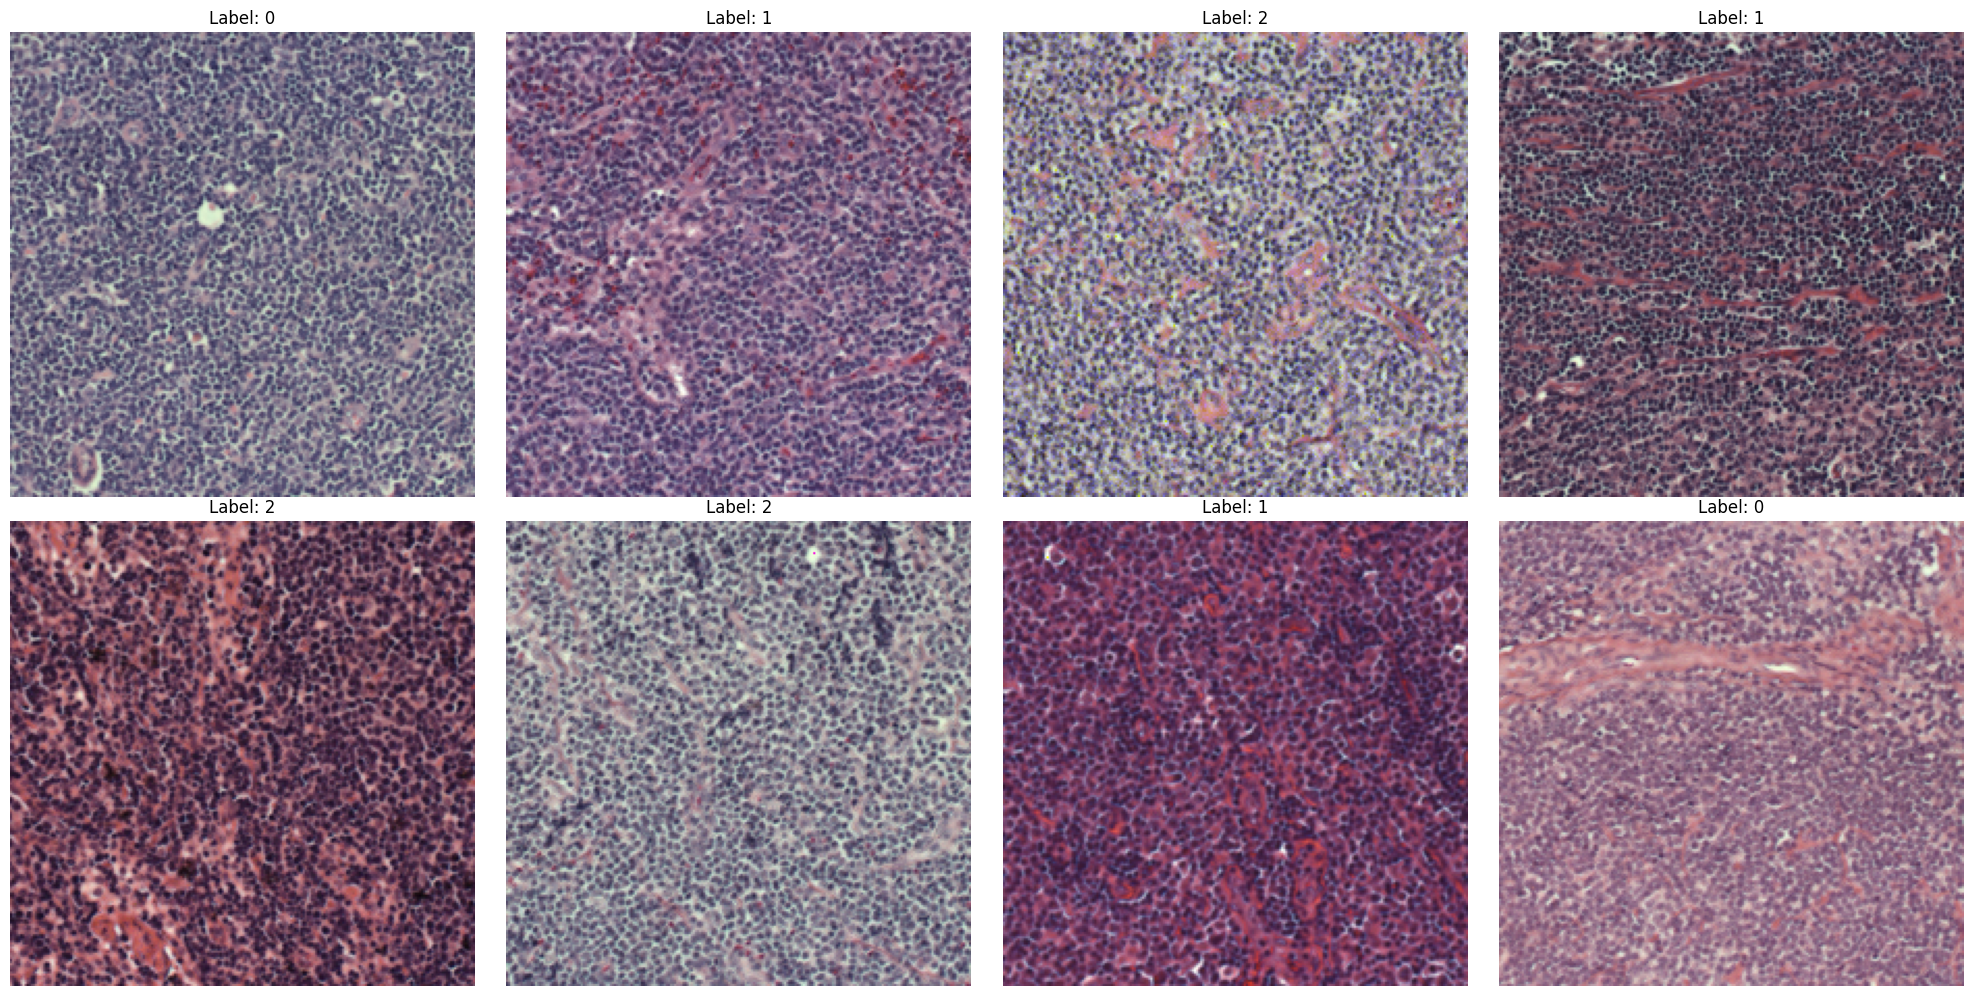

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP7.APP7, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 171MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app7.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0644951837972678,--- Validation loss: 0.9072011299639441
Train Accuracy: 44.57%,--- Val Accuracy: 52.51%
--------------------------


Epoch [2/100] - Train loss: 0.8404756772817011,--- Validation loss: 0.7878957034489296
Train Accuracy: 57.52%,--- Val Accuracy: 61.45%
--------------------------


Epoch [3/100] - Train loss: 0.7328472160695323,--- Validation loss: 0.6292064236529047
Train Accuracy: 63.51%,--- Val Accuracy: 64.80%
--------------------------


Epoch [4/100] - Train loss: 0.6594537232579627,--- Validation loss: 0.8373343561614692
Train Accuracy: 69.92%,--- Val Accuracy: 56.98%
--------------------------


Epoch [5/100] - Train loss: 0.626600288664066,--- Validation loss: 0.6106717954467795
Train Accuracy: 69.92%,--- Val Accuracy: 69.83%
--------------------------


Epoch [6/100] - Train loss: 0.4866903790358381,--- Validation loss: 0.4571286689635762
Train Accuracy: 77.99%,--- Val Accuracy: 82.68%
--------------------------


Epoch [7/100] - T

# Plotting Result

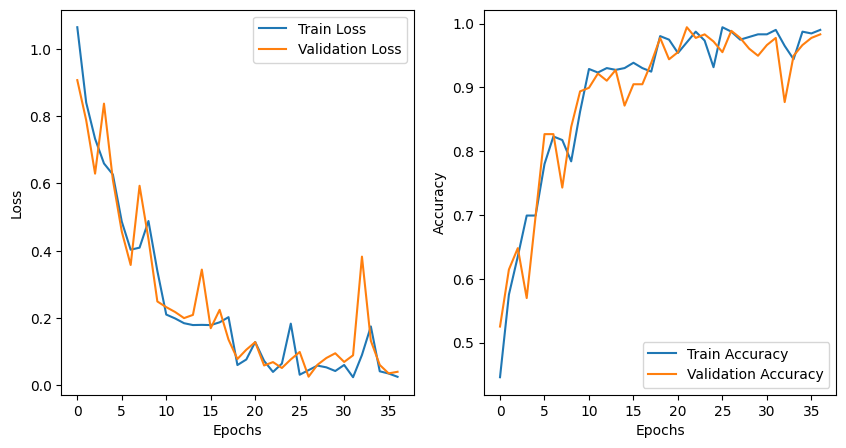

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.96      0.93      0.94        27
           2       0.78      0.95      0.86        19

    accuracy                           0.92        75
   macro avg       0.91      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75

Accuracy of the network on the test images: 92.00 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app7.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0007446162547906,--- Validation loss: 1.1069534377678814
Train Accuracy: 55.01%,--- Val Accuracy: 34.08%
--------------------------


Epoch [2/100] - Train loss: 0.6530049838395504,--- Validation loss: 0.5145386660565211
Train Accuracy: 79.39%,--- Val Accuracy: 81.56%
--------------------------


Epoch [3/100] - Train loss: 0.34496247195599805,--- Validation loss: 0.13743724657337092
Train Accuracy: 89.69%,--- Val Accuracy: 98.32%
--------------------------


Epoch [4/100] - Train loss: 0.18004709967829724,--- Validation loss: 0.0755249436882288
Train Accuracy: 94.29%,--- Val Accuracy: 98.32%
--------------------------


Epoch [5/100] - Train loss: 0.11630039070642094,--- Validation loss: 0.03344766207185038
Train Accuracy: 96.80%,--- Val Accuracy: 99.44%
--------------------------


Epoch [6/100] - Train loss: 0.10291813581683841,--- Validation loss: 0.04690904400243773
Train Accuracy: 96.80%,--- Val Accuracy: 99.44%
--------------------------


Epoch [7/

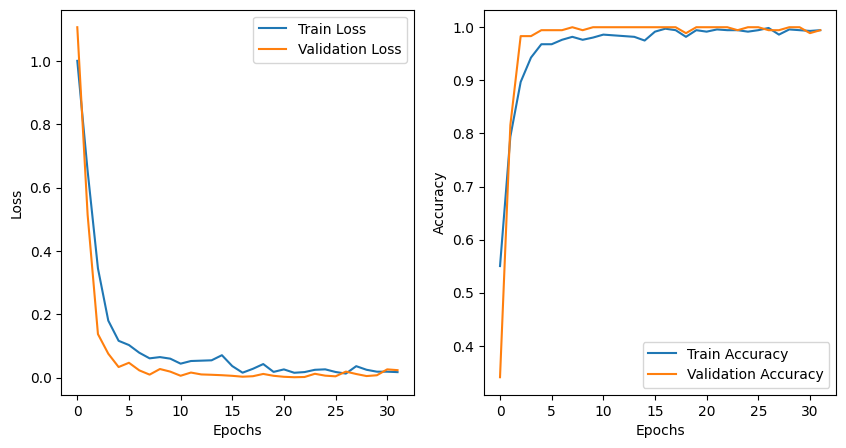

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      0.96      0.96        27
           2       0.90      0.95      0.92        19

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Accuracy of the network on the test images: 96.00 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 133MB/s] 


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app7.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.7709740718261113,--- Validation loss: 1.0305186077203166
Train Accuracy: 66.85%,--- Val Accuracy: 43.58%
--------------------------


Epoch [2/100] - Train loss: 0.3347224368192359,--- Validation loss: 0.23109627028084334
Train Accuracy: 88.30%,--- Val Accuracy: 94.41%
--------------------------


Epoch [3/100] - Train loss: 0.1704895031485385,--- Validation loss: 0.11251561489351634
Train Accuracy: 95.13%,--- Val Accuracy: 98.88%
--------------------------


Epoch [4/100] - Train loss: 0.1067805956934986,--- Validation loss: 0.04850477866786818
Train Accuracy: 97.21%,--- Val Accuracy: 99.44%
--------------------------


Epoch [5/100] - Train loss: 0.10128772572139512,--- Validation loss: 0.032164025385786034
Train Accuracy: 97.35%,--- Val Accuracy: 99.44%
--------------------------


Epoch [6/100] - Train loss: 0.05600352310847937,--- Validation loss: 0.02085498313018896
Train Accuracy: 98.47%,--- Val Accuracy: 99.44%
--------------------------


Epoch [7

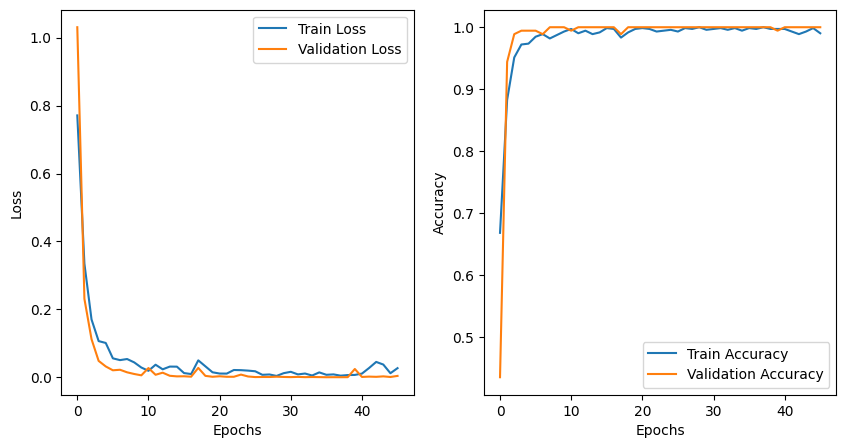

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      0.96      0.98        27
           2       0.90      1.00      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %
